<a href="https://colab.research.google.com/github/phps-28/Data-Science/blob/master/Projeto_Minera%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importar bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

**Carregando o dataset de Câncer, onde o objetivo é estabeler um modelo que prediga se o câncer é Benígno (B) ou Malígno (M)**

# df
**Carregando a base de dados**

In [ ]:
df = pd.read_csv('/content/sample_data/Cancer_Data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.shape

(569, 33)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**O dataset possui 32 colunas de preditoras**

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Verificando se há dados vazios na base de dados**

In [ ]:
df.notnull().sum()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

**Existe uma coluna "Unnamed" que está vazia - Será retirada**

**A coluna "id" também será descartada**

# df_1

In [ ]:
df_1 = pd.DataFrame()
df_1 = df.copy()

**Retirando as colunas 'id' e 'Unnamed: 32' por não fazerem sentido no dataset**

In [ ]:
df_1.drop(columns = ['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
df_1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# df_2
\
**Rearanjando o dataset e definindo a resposta binária para a target (Diagnóstico)**

In [ ]:
df_2 =  pd.DataFrame(data=df_1, columns=['radius_mean',
                                         'texture_mean',
                                         'perimeter_mean',
                                         'area_mean',
                                         'smoothness_mean',
                                         'compactness_mean',
                                         'concavity_mean',
                                         'concave points_mean',
                                         'symmetry_mean',
                                         'fractal_dimension_mean',
                                         'radius_se',
                                         'texture_se',
                                         'perimeter_se',
                                         'area_se',
                                         'smoothness_se',
                                         'compactness_se',
                                         'concavity_se',
                                         'concave points_se',
                                         'symmetry_se',
                                         'fractal_dimension_se',
                                         'radius_worst',
                                         'texture_worst',
                                         'perimeter_worst',
                                         'area_worst',
                                         'smoothness_worst',
                                         'compactness_worst',
                                         'concavity_worst',
                                         'concave points_worst',
                                         'symmetry_worst',
                                         'fractal_dimension_worst',
                                         'diagnosis']) # <- Target

**Transformando a coluna resposta (target) para 0 ou 1**

**Maligno - 1/Benigno - 0**

In [ ]:
df_2['diagnosis'].replace({"M":1, "B":0}, inplace=True)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

**Verificando a distribuição dos dados através da Densidade**

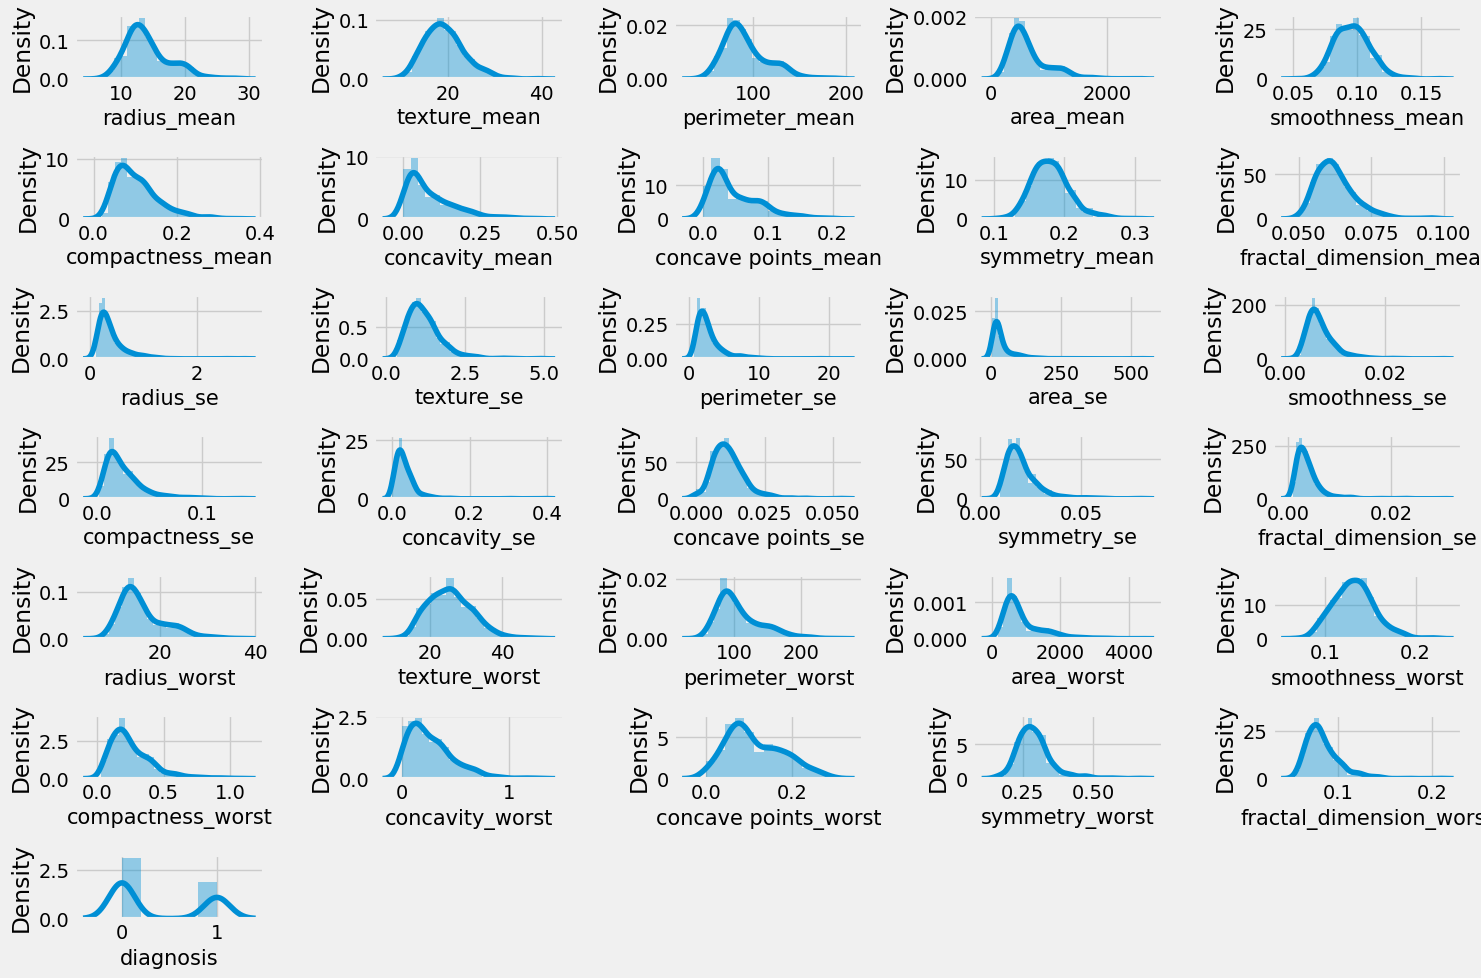

In [ ]:
plt.figure(figsize = (15, 10))
plotnumber = 1

for column in df_2:
    if plotnumber <= 31: #
        ax = plt.subplot(7, 5, plotnumber)
        sns.distplot(df_2[column])
        plt.xlabel(column, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

**Verificando a distribuição os resultados da variável de resposta em relação às preditoras**

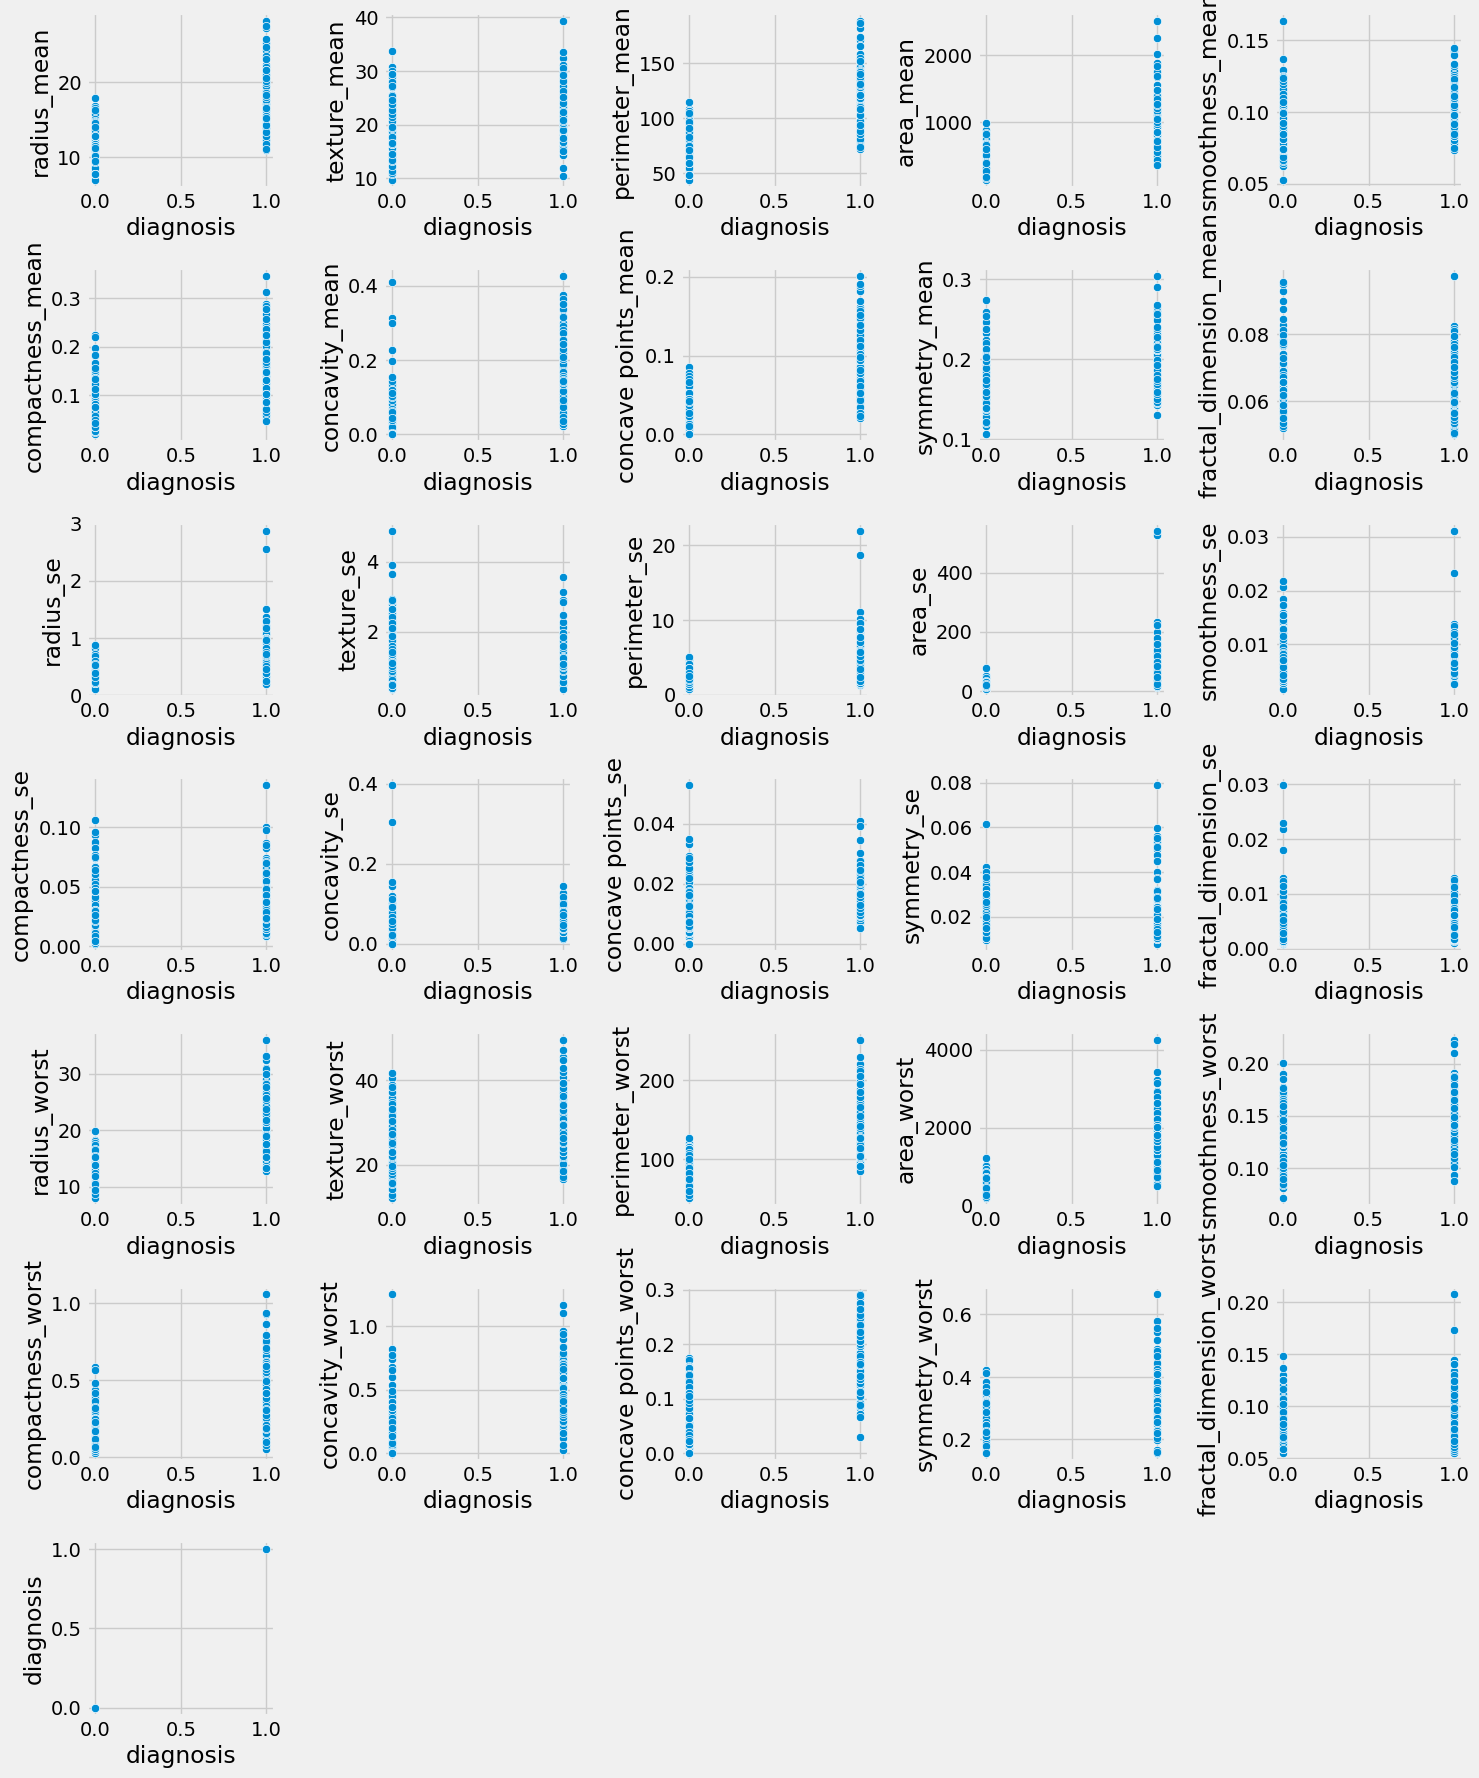

In [ ]:
plt.figure(figsize = (15, 18))
plotnumber = 1

for column in df_2:
    if plotnumber <= 31: # numero de colunas no dataset
        ax = plt.subplot(7, 5, plotnumber)
        sns.scatterplot(x = df_2['diagnosis'], y = df_2[column])

    plotnumber += 1

plt.tight_layout()
plt.show()

**Olhando os dados de df_2 com box plot**

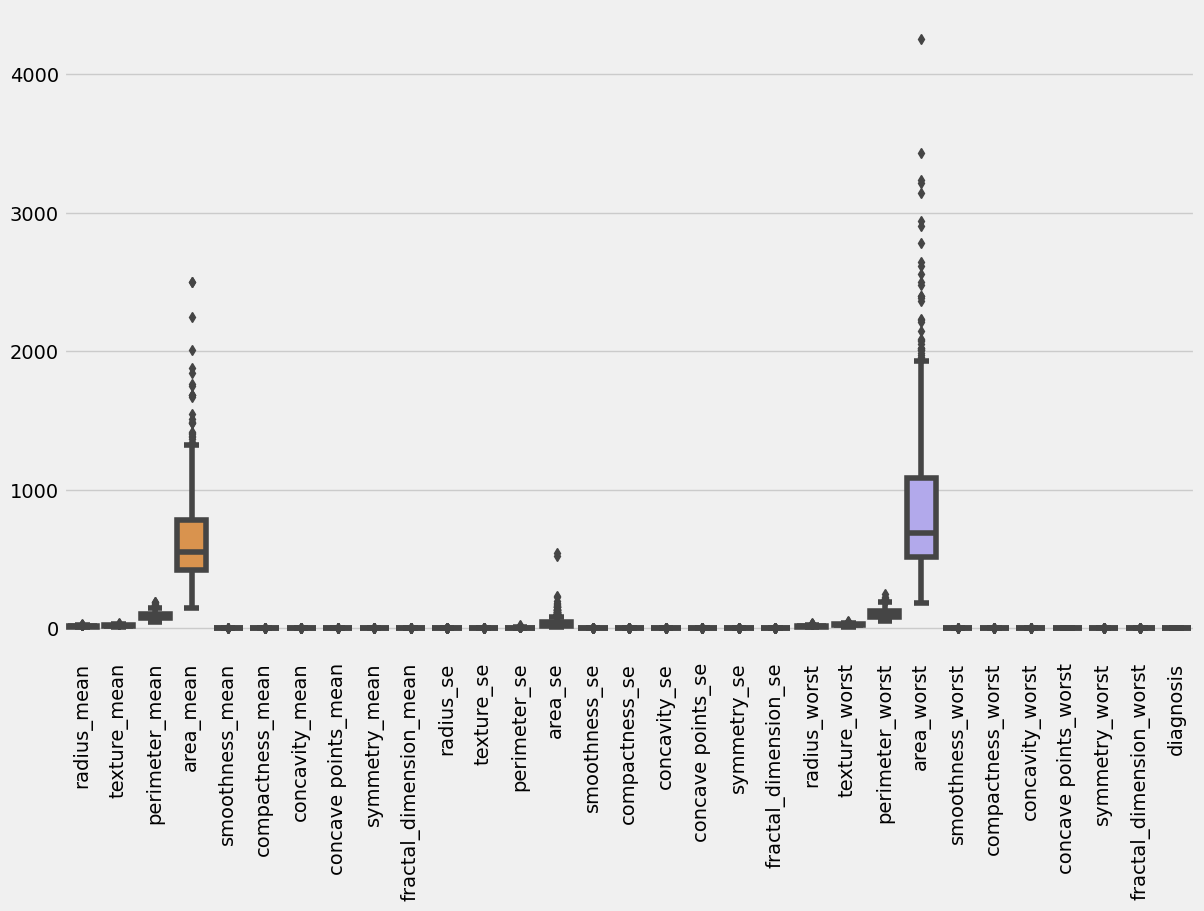

In [ ]:
plt.figure(figsize = (13, 8))
sns.boxplot(data = df_2, width = 0.8)
plt.xticks(rotation=90)
plt.show()

**Separando o dataset em conjunto de Preditoras e conjunto de Resposta**

In [ ]:
X_df_2 = df_2.drop(columns = 'diagnosis', axis = 1) # Preditoras
y_df_2 = df_2['diagnosis'] # Resposta

Normalizando os coeficientes das preditoras

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_df_2_scaled = scaler.fit_transform(X_df_2)

Montando um dataset com os dados normalizados

# df_X_df_2_scaled

In [ ]:
df_X_df_2_scaled = pd.DataFrame(data = X_df_2_scaled, columns=[X_df_2.columns])

**Olhando os dados NORMALIZADOS (Preditoras) com box plot**

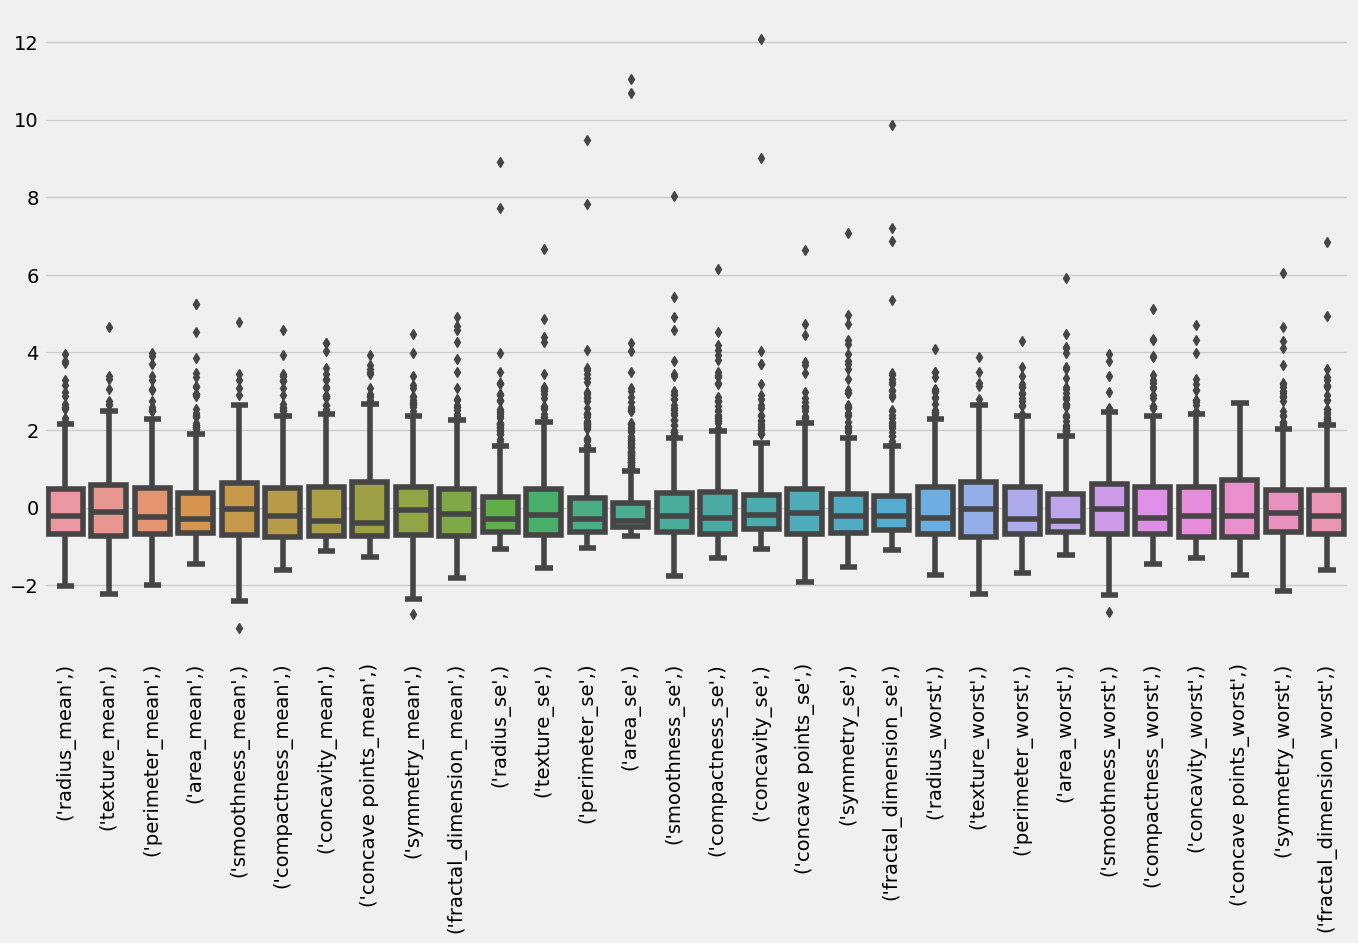

In [ ]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_X_df_2_scaled, width = 0.8)
plt.xticks(rotation=90)
plt.show()

**Heatmap de correlação do dataset df_2**

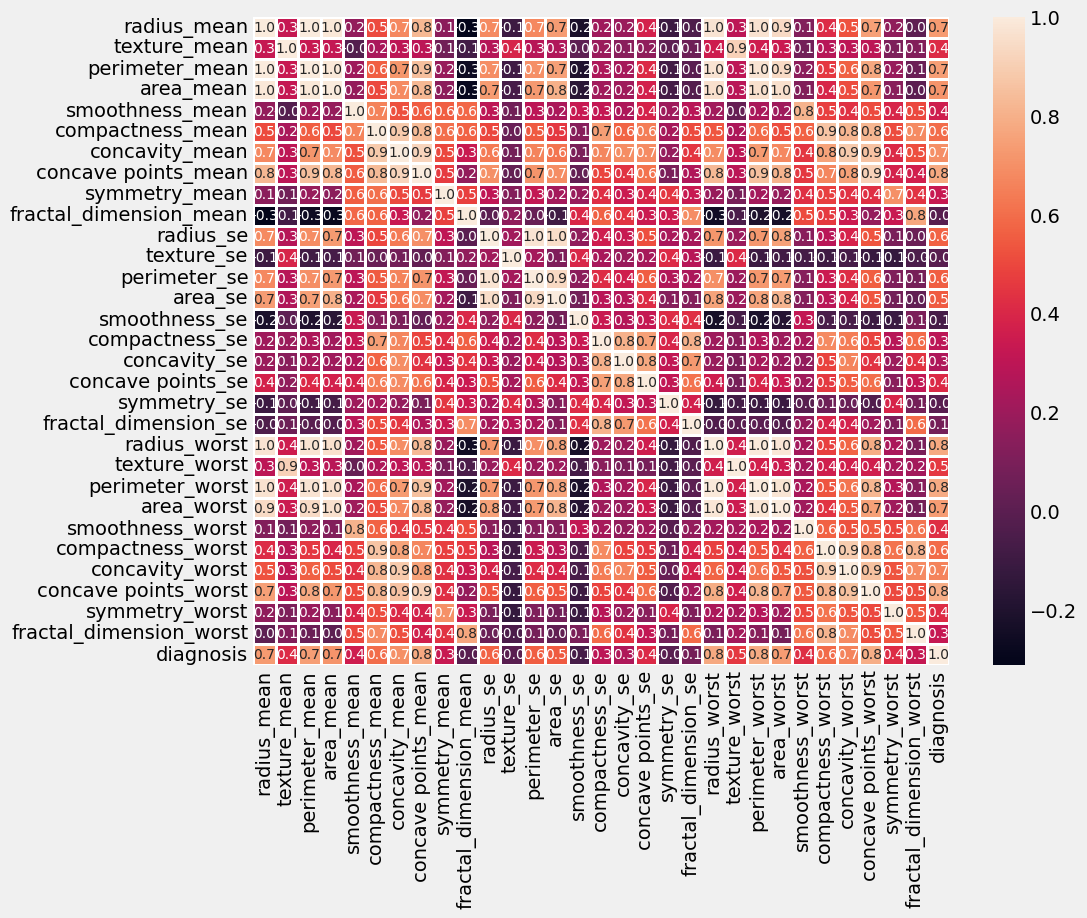

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(df_2.corr(), annot = True, fmt = '1.1f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

**Calculando VIF de df_2**

**Verificando a multicolinearidade das preditoras de df_2**


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df_2 = pd.DataFrame()
vif_df_2["Fator VIF"] = [variance_inflation_factor(X_df_2, i) for i in range(X_df_2.shape[1])] # X.shape[1] -> numero de colunas
vif_df_2["Preditoras"] = df_2.columns[0:30]

vif_df_2.round(1)

,Fator VIF,Preditoras
0,63306.2,radius_mean
1,251.0,texture_mean
2,58123.6,perimeter_mean
3,1287.3,area_mean
4,393.4,smoothness_mean
5,201.0,compactness_mean
6,157.9,concavity_mean
7,154.2,concave points_mean
8,184.4,symmetry_mean
9,629.7,fractal_dimension_mean


# df_3

In [ ]:
df_3 = pd.DataFrame()
df_3 = df_2.copy()

**Retirando as preditoras com maior multicolinearidade do conjunto 'df_3'**

In [ ]:
df_3.drop(columns = ['radius_mean', 'perimeter_mean', 'area_mean', 'area_mean', 'perimeter_worst', 'area_worst'], axis = 1, inplace = True)

In [ ]:
df_3.shape

(569, 26)

Separando o dataset df_3 em conjunto de Preditoras e conjunto de Resposta

In [ ]:
X_df_3 = df_3.drop(columns = 'diagnosis', axis = 1) # preditoras
y_df_3 = df_3['diagnosis'] # Resposta

In [ ]:
X_df_3.shape

(569, 25)

Calculando VIF novamente para a base df_3

verificando a multicolinearidade das preditoras

In [ ]:
vif = pd.DataFrame()
vif["Fator VIF"] = [variance_inflation_factor(X_df_3, i) for i in range(X_df_3.shape[1])] # X.shape[1] -> numero de colunas
vif["Preditoras"] = X_df_3.columns[0:25]

vif.round(1)

,Fator VIF,Preditoras
0,238.1,texture_mean
1,361.6,smoothness_mean
2,110.9,compactness_mean
3,144.5,concavity_mean
4,141.1,concave points_mean
5,175.8,symmetry_mean
6,535.2,fractal_dimension_mean
7,102.1,radius_se
8,23.8,texture_se
9,90.8,perimeter_se


# df_4

In [ ]:
df_4 = pd.DataFrame()
df_4 = df_3.copy()

In [ ]:
df_4.columns

Index(['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'diagnosis'],
      dtype='object')

Retirando as preditoras com maior multicolinearidade do conjunto 'df_4'

In [ ]:
df_4.drop(columns = ['texture_mean',
                     'smoothness_mean',
                     'compactness_mean',
                     'concavity_mean',
                     'concave points_mean',
                     'symmetry_mean',
                     'texture_worst',
                     'smoothness_worst',
                     'fractal_dimension_mean',
                     'fractal_dimension_worst'], axis = 1, inplace = True)

Separando o dataset df_4 em conjunto de Preditoras e conjunto de Resposta


In [ ]:
X_df_4 = df_4.drop(columns = 'diagnosis', axis = 1) # preditoras
y_df_4 = df_4['diagnosis'] # Resposta

In [ ]:
X_df_4.shape

(569, 15)

Calculando VIF novamente para a base df_4

Verificando a multicolinearidade das preditoras

In [ ]:
vif = pd.DataFrame()
vif["Fator VIF"] = [variance_inflation_factor(X_df_4, i) for i in range(X_df_4.shape[1])] # X.shape[1] -> numero de colunas
vif["Preditoras"] = X_df_4.columns[0:17]

vif.round(1)

,Fator VIF,Preditoras
0,93.7,radius_se
1,8.4,texture_se
2,82.0,perimeter_se
3,29.1,area_se
4,9.8,smoothness_se
5,35.1,compactness_se
6,22.5,concavity_se
7,37.8,concave points_se
8,23.2,symmetry_se
9,12.2,fractal_dimension_se


# df_5

In [ ]:
df_5 = pd.DataFrame()
df_5 = df_4.copy()

Retirando as colunas com maior colinearidade

In [ ]:
df_5.drop(columns = ['radius_se',
                     'perimeter_se',
                     'compactness_worst',
                     'concave points_worst',
                     'symmetry_worst',
                     'concavity_worst'], axis = 1, inplace = True)

Separando o dataset df_5 em conjunto de Preditoras e conjunto de Resposta

In [ ]:
X_df_5 = df_5.drop(columns = 'diagnosis', axis = 1) # preditoras
y_df_5 = df_5['diagnosis'] # Resposta

In [ ]:
df_5.shape

(569, 10)

Calculando VIF novamente para a base df_5

Verificando a multicolinearidade das preditoras

In [ ]:
vif = pd.DataFrame()
vif["Fator VIF"] = [variance_inflation_factor(X_df_5, i) for i in range(X_df_5.shape[1])] # X.shape[1] -> numero de colunas
vif["Preditoras"] = X_df_5.columns[0:10]

vif.round(1)

,Fator VIF,Preditoras
0,7.5,texture_se
1,3.0,area_se
2,9.0,smoothness_se
3,13.8,compactness_se
4,8.0,concavity_se
5,15.8,concave points_se
6,9.4,symmetry_se
7,10.6,fractal_dimension_se
8,9.5,radius_worst


# df_6

In [ ]:
df_6 = pd.DataFrame()
df_6 = df_5.copy()

Retirando as colunas com maior colinearidade

In [ ]:
df_6.drop(columns = ['compactness_se',
                     'concave points_se'], axis = 1, inplace = True)

Separando o dataset df_6 em conjunto de Preditoras e conjunto de Resposta

In [ ]:
X_df_6 = df_6.drop(columns = 'diagnosis', axis = 1) # Preditoras
y_df_6 = df_6['diagnosis'] # Resposta

In [ ]:
X_df_6.shape

(569, 7)



Heatmap de correlação do dataset df_6



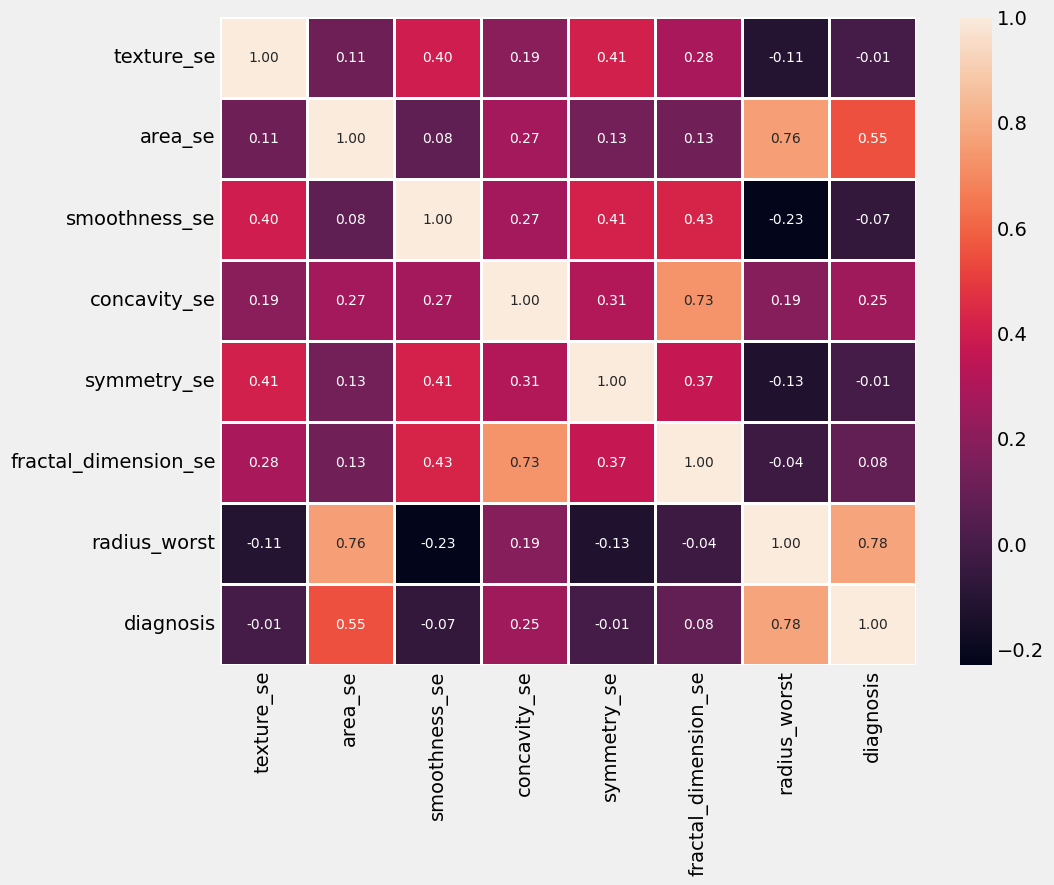

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(df_6.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

Calculando VIF novamente para a base df_6

Verificando a multicolinearidade das preditoras

In [ ]:
vif = pd.DataFrame()
vif["Fator VIF"] = [variance_inflation_factor(X_df_6, i) for i in range(X_df_6.shape[1])] # X.shape[1] -> numero de colunas
vif["Preditoras"] = X_df_6.columns[0:10]

vif.round(1)

,Fator VIF,Preditoras
0,7.4,texture_se
1,2.9,area_se
2,8.6,smoothness_se
3,4.9,concavity_se
4,9.2,symmetry_se
5,7.6,fractal_dimension_se
6,7.9,radius_worst


Normalizando os coeficientes das preditoras (X_df_6)

In [ ]:
scaler = StandardScaler()
X_df_6_scaled = scaler.fit_transform(X_df_6)

Dividindo o conjunto de dados em TREINO (70%) e TESTE (30%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_df_6, X_test_df_6, y_train_df_6, y_test_df_6 = train_test_split(X_df_6_scaled, y_df_6, test_size = 0.30, random_state = 1234)

Determinação do Erro Médio Quadrático para determinação do melhor Pârametro de Rotação

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv_df_6_train(model):
    rmse_df_6_train = np.sqrt(-cross_val_score(model, X_train_df_6, y_train_df_6, scoring="neg_mean_squared_error", cv = 10))
    return(rmse_df_6_train)

Fazer a Regularização Ridge L2

Treino

In [ ]:
lambdas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20]

In [ ]:
model_ridge = Ridge(alpha = lambdas)

In [ ]:
cv_ridge_df_6_train = [rmse_cv_df_6_train(Ridge(alpha = alpha)).mean()
            for alpha in lambdas]

Text(0, 0.5, 'rmse')

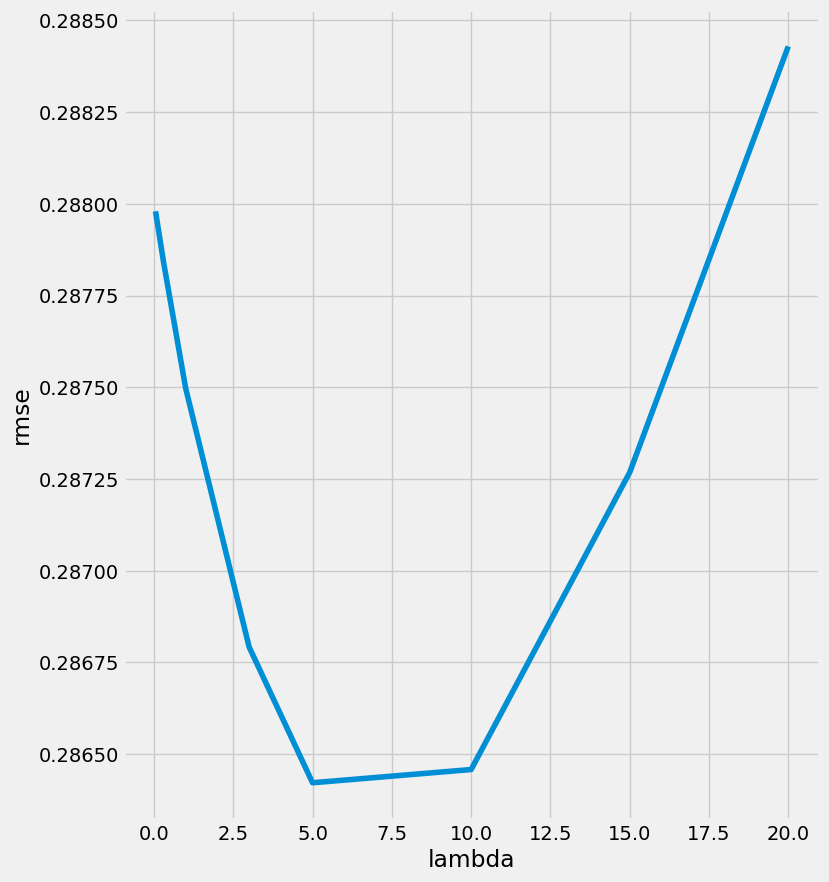

In [ ]:
cv_ridge_df_6_train = pd.Series(cv_ridge_df_6_train, index = lambdas)
cv_ridge_df_6_train.plot()
plt.xlabel("lambda")
plt.ylabel("rmse")

In [ ]:
cv_ridge_df_6_train.min()

0.28642193500431323

Estabelecendo o Lambda ideal que faz com que o erro seja mínimo usando o modelo RIGDE

In [ ]:
lmbd = ridge_cv_df_6.alpha_
lmbd

5.0

Montando o modelo com o Lambda Ideal

In [ ]:
ridge_df_6 = Ridge(alpha = lmbd)
ridge_df_6.fit(X_train_df_6, y_train_df_6)

Ridge(alpha=5.0)

Treinando o modelo com o conjutno de TREINO

In [ ]:
round(ridge_df_6.score(X_train_df_6, y_train_df_6), ndigits=3)

0.658

Testando o modelo no conjunto de TESTE

In [ ]:
round(ridge_df_6.score(X_test_df_6, y_test_df_6), ndigits=3)

0.564

Criando uma função que cria o R^2 ajustado

In [ ]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

Ajuste de R Quadrado na Ridge no conjunto de TREINO

In [ ]:
print(round((adj_r2(X_train_df_6, y_train_df_6, ridge_df_6)), ndigits=3))

0.652


Ajuste de R Quadrado na Ridge no conjunto de TESTE

In [ ]:
print(round((adj_r2(X_test_df_6, y_test_df_6, ridge_df_6)), ndigits=3))

0.545


Fazer a Regularização LASSO L1

In [ ]:
train_model_lasso_df_6 = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train_df_6, y_train_df_6)

Olhando para o Erro Médio do ajuste do modelo LASSO ao conjunto de TREINO

In [ ]:
rmse_cv_df_6(train_model_lasso_df_6).mean()

0.28770915059817626

Olhando para o Erro Mínimo do ajuste do modelo LASSO ao conjunto de TREINO

In [ ]:
rmse_cv_df_6(train_model_lasso_df_6).min()

0.24427843821467254

Verificando as variáveis selecionadas pelo modelo

In [ ]:
train_coef_lasso_df_6 = pd.Series(train_model_lasso_df_6.coef_, index = X_df_6.columns)

In [ ]:
print("Lasso selecionou " + str(sum(train_coef_lasso_df_6 != 0)) + " variáveis e eliminou outras " +  str(sum(train_coef_lasso_df_6 == 0)) + " variáveis")

Lasso selecionou 7 variáveis e eliminou outras 0 variáveis


Ordenação das variáveis mais importantes para a Lasso

In [ ]:
train_imp_coef_lasso_df_6 = train_coef_lasso_df_6.sort_values().head(10)

Text(0.5, 1.0, 'Coeficientes da Regressão LASSO')

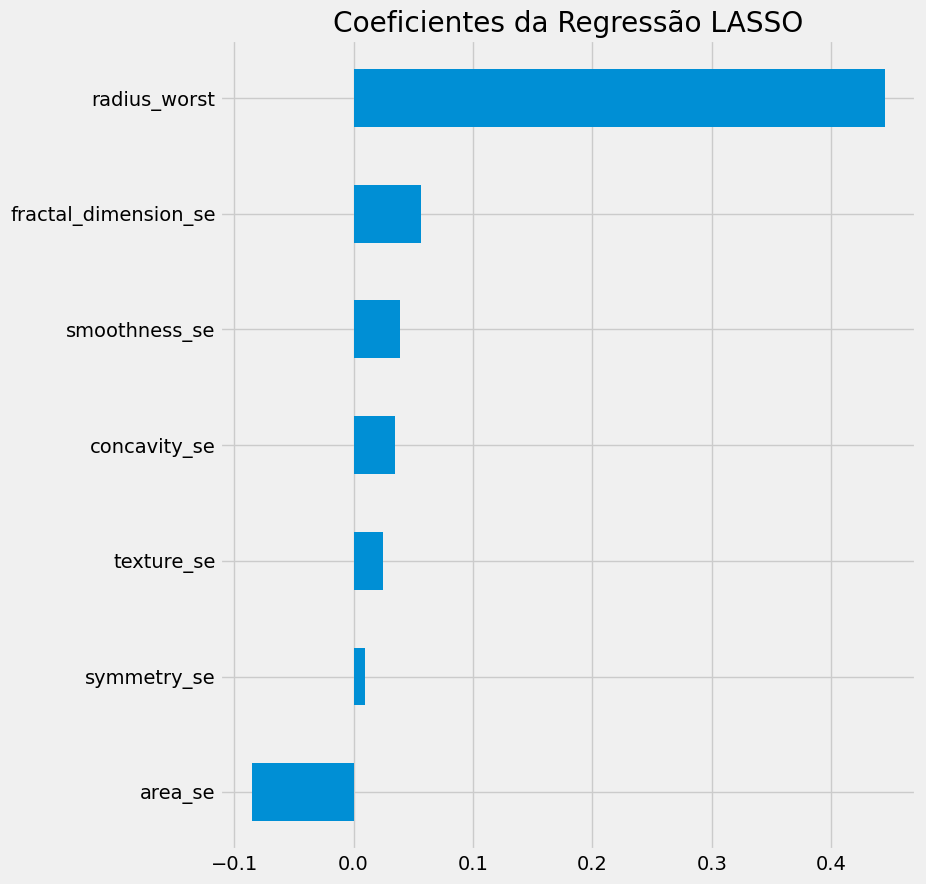

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
train_imp_coef_lasso_df_6.plot(kind = "barh")
plt.title("Coeficientes da Regressão LASSO")

Fazendo a avaliação do modelo no conjunto de TREINO

Acurácia

In [ ]:
round(train_model_lasso_df_6.score(X_train_df_6, y_train_df_6), ndigits=3)

0.659

Verificando o modelo LASSO com o conjunto de TESTE

In [ ]:
test_model_lasso_df_6 = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_test_df_6, y_test_df_6)

Olhando para o Erro Médio do ajuste do modelo LASSO ao conjunto de TESTE

In [ ]:
rmse_cv_df_6(test_model_lasso_df_6).mean()

0.28770915059817626

Olhando para o Erro Mínimo do ajuste do modelo LASSO ao conjunto de TESTE

In [ ]:
rmse_cv_df_6(test_model_lasso_df_6).min()

0.24427843821467254

Fazendo a avaliação do modelo LASSO no conjunto de TESTE

Acurácia

In [ ]:
round(test_model_lasso_df_6.score(X_test_df_6, y_test_df_6), ndigits=3)

0.64

In [ ]:
test_model_lasso_df_6.coef_

array([ 0.00268393, -0.13162906,  0.0658611 ,  0.03617741,  0.04338223,
       -0.04000311,  0.48922368])

In [ ]:
X_df_6_scaled[23]

array([-0.16302502,  1.18045599, -0.77102423, -0.48885774, -1.1759506 ,
       -0.68384206,  2.67153241])

In [ ]:
dado = np.array([[test_model_lasso_df_6.intercept_,-0.16302502,  1.18045599, -0.77102423, -0.48885774, -1.1759506 ,-0.68384206]])
previsao = test_model_lasso_df_6.predict(dado)
print(previsao)

[0.1620519]


------------------------
Agora considerando o df_2, onde todas as variáveis estavam presentes mesmo que havendo colinearidade entre elas
-----------------------

In [ ]:
# Dividindo o conjunto de dados em TREINO (70%) e TESTE (30%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 1234)

In [ ]:
# Determinação do Erro Médio Quadrático para determinação do melhor Pârametro de Rotação

from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [ ]:
model_ridge = Ridge()

In [ ]:
cv_ridge = pd.Series(cv_ridge, index = lambdas)
cv_ridge.plot()
plt.xlabel("lambda")
plt.ylabel("rmse")

In [ ]:
cv_ridge.min()

In [ ]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [ ]:
rmse_cv(model_lasso).mean()

In [ ]:
coef_lasso = pd.Series(model_lasso.coef_, index = X.columns)

In [ ]:
print("Lasso selecionou " + str(sum(coef_lasso != 0)) + " variáveis e eliminou outras " +  str(sum(coef_lasso == 0)) + " variáveis")

In [ ]:
# Ordenação das variáveis mais importantes para a Lasso
imp_coef_lasso = pd.concat([coef_lasso.sort_values().head(10),
                     coef_lasso.sort_values().tail(10)])

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_lasso.plot(kind = "barh")
plt.title("Coeficientes da Regressão Lasso")